In [1]:
pip install pillow easyocr textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 9.9 MB/s eta 0:00:00


In [20]:
from google.colab import files
import os

uploaded = files.upload()
meme_files = list(uploaded.keys())
print(f"Successfully uploaded: {meme_files}")

Saving meme_4.jpg to meme_4 (1).jpg
Saving meme_3.jpg to meme_3 (2).jpg
Saving meme_2.jpg to meme_2 (1).jpg
Saving meme_1.jpg to meme_1 (1).jpg
Successfully uploaded: ['meme_4 (1).jpg', 'meme_3 (2).jpg', 'meme_2 (1).jpg', 'meme_1 (1).jpg']


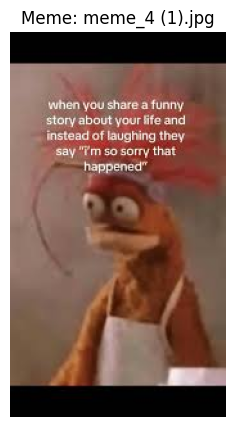

Raw OCR: when VOU share a funnv story about vour life and Instead of laughing they sav "Ym 50 SOry that happened"
Cleaned Text: when VOU share a funny story about your life and Instead of laughing they say "Am 50 very that happened"
Polarity: 0.23 | Subjectivity: 0.65
Vibe: Positive
--------------------------------------------------


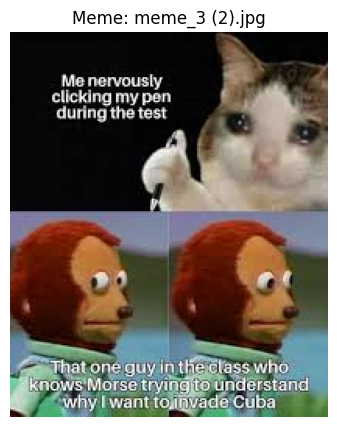

Raw OCR: Menervously clicking my pen duringthetest That oneguy inthe class who knows Morse To lnderstand Wu want toinvade Cuba Inyuup
Cleaned Text: Nervously clinking my pen duringthetest That oneguy the class who knows Horse To understand U want invade Cuba Inyuup
Polarity: 0.00 | Subjectivity: 0.00
Vibe: Neutral
--------------------------------------------------


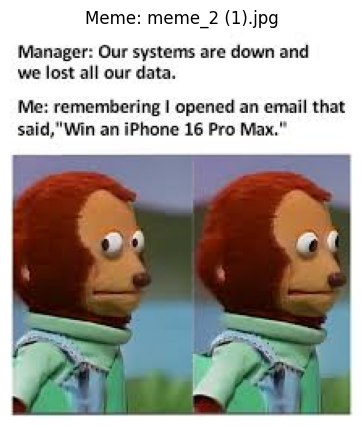

Raw OCR: Manager: Our systems re down and we lost all our data: Mc: remembering opened email that said 'Win an iPhone 16 Pro Max'
Cleaned Text: Manager: Our systems re down and we lost all our data: C: remembering opened email that said 'In an shone 16 Fro Tax'
Polarity: -0.16 | Subjectivity: 0.29
Vibe: Negative
--------------------------------------------------


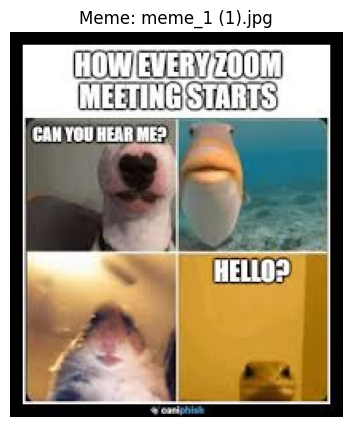

Raw OCR: QOWETERYZOOM CEE UNGSTARis CUN ICUHERCE HE4LO?
Cleaned Text: QOWETERYZOOM CEE UNGSTARis CUN ICUHERCE HE4LO?
Polarity: 0.00 | Subjectivity: 0.00
Vibe: Neutral
--------------------------------------------------


In [21]:


import easyocr
from PIL import Image
from textblob import TextBlob
import matplotlib.pyplot as plt
import torch
import re

device = True if torch.cuda.is_available() else False
reader = easyocr.Reader(['en'], gpu=device)

def clean_text(text):
    text = text.replace('\n', ' ').strip()
    cleaned = str(TextBlob(text).correct())
    return cleaned

def process_meme(file_path):
    img = Image.open(file_path)
    img.thumbnail((500, 500))

    results = reader.readtext(file_path, detail=0)
    raw_text = " ".join(results)

    final_text = clean_text(raw_text)

    analysis = TextBlob(final_text)
    pol = analysis.sentiment.polarity
    sub = analysis.sentiment.subjectivity

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Meme: {file_path}")
    plt.show()

    print(f"Raw OCR: {raw_text}")
    print(f"Cleaned Text: {final_text}")
    print(f"Polarity: {pol:.2f} | Subjectivity: {sub:.2f}")

    if pol > 0:
        print("Vibe: Positive")
    elif pol < 0:
        print("Vibe: Negative")
    else:
        print("Vibe: Neutral")

    print("-" * 50)

for filename in uploaded.keys():
    try:
        process_meme(filename)
    except Exception as e:
        print(f"Error processing {filename}: {e}")